<a href="https://colab.research.google.com/github/Parna19/Vardaan-EDA/blob/main/Vardaan_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving Sales.csv to Sales.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
print(os.path.getsize('Sales.csv'))
#If the file is 5 KB, the function might return 5120 (since 1 KB = 1024 bytes).


#STEPS NEEDED TO BE PERFORM OV ER THE DATA(DATA PREPROCESSING)

# Load the dataset -D
# Handle missing values -D(replaced with median)
# Convert data types (e.g., dates, numbers)-D
# Remove duplicates -D
# Fix inconsistent formatting -D
# Handle outliers -D
# ✔ Data Normalization/Scaling – Standardize numeric values (e.g., Min-Max Scaling) for better comparisons.-D
# ✔ Encoding Categorical Data – Convert text categories into numbers (e.g., One-Hot Encoding for "Payment Type").-D
# Grouping & Aggregation – Summarize data (e.g., total sales per store, monthly revenue).-D
# Save the cleaned data -DONE


326295


In [ ]:
df = pd.read_csv('Sales.csv')

print(df.head())

         Date  Party Name Transaction Type  Total Amount Payment Type  \
0  01/02/2024  9311383344             Sale         720.0        SWIPE   
1  01/02/2024   Cash Sale             Sale        1075.0         Cash   
2  01/02/2024  9947793289             Sale         155.0         Cash   
3  01/02/2024   Cash Sale             Sale         100.0         Cash   
4  01/02/2024   Cash Sale             Sale         290.0         Cash   

   Received Amount  Balance Amount  
0            720.0             0.0  
1           1075.0             0.0  
2            155.0             0.0  
3            100.0             0.0  
4            290.0             0.0  


In [ ]:
print(df.isnull().sum())

# EXAMPLE------------------------------------------------------------------------------------------------------------------------------------------------
# import pandas as pd
# import numpy as np

# data = {"Name": ["Alice", "Bob", None],  # 'None' is a null value
#         "Age": [25, np.nan, 30]}  # 'NaN' is a null value

# df = pd.DataFrame(data)
# print(df)

# here None and np.nan are null values

Date                0
Party Name          0
Transaction Type    0
Total Amount        3
Payment Type        0
Received Amount     3
Balance Amount      3
dtype: int64


In [ ]:
df.fillna({"Total Amount": df["Total Amount"].median(),
           "Received Amount": df["Received Amount"].median(),
           "Balance Amount": df["Balance Amount"].median()}, inplace=True)

print("Null values replaced with median successfully!")


Null values replaced with median successfully!


In [ ]:
print(df.describe())
# ✔ Quick Data Summary → Get key stats like mean, min, max, and std dev.
# ✔ Detect Missing or Incorrect Data → Check for unexpected low counts or extreme values.
# ✔ Find Outliers → Identify unusual min/max values that may need attention.
# ✔ Better Decision-Making → Use insights for pricing, stock, and sales strategies.

# Example:
# If max sale = $10,000 but average = $500, there might be an outlier (a rare big sale).

       Total Amount  Received Amount  Balance Amount
count   6100.000000      6100.000000     6100.000000
mean     536.584761       499.814966       36.754254
std     2111.713304      1951.950211      745.977112
min        0.000000         0.000000        0.000000
25%       89.000000        65.000000        0.000000
50%      216.000000       198.000000        0.000000
75%      483.250000       460.500000        0.000000
max    88000.000000     88000.000000    55140.000000


In [ ]:
#CONVERT DATATYPESSSSSSSSSSSSSSSS

import pandas as pd

# Assuming your CSV file is named 'Sales - Sheet1.csv'
df = pd.read_csv('Sales.csv')  # Load the DataFrame

# Convert data types
for col in ["Total Amount", "Received Amount", "Balance Amount"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.dtypes)  # Display updated data types

Date                 object
Party Name           object
Transaction Type     object
Total Amount        float64
Payment Type         object
Received Amount     float64
Balance Amount      float64
dtype: object


In [ ]:
print(df.isnull().sum())  # Check if any new missing values appeared


Date                0
Party Name          0
Transaction Type    0
Total Amount        3
Payment Type        0
Received Amount     3
Balance Amount      3
dtype: int64


In [ ]:
df = df.copy()  # Ensure we are working on a direct copy of the DataFrame

df["Total Amount"] = df["Total Amount"].fillna(df["Total Amount"].median())
df["Received Amount"] = df["Received Amount"].fillna(df["Received Amount"].median())
df["Balance Amount"] = df["Balance Amount"].fillna(df["Balance Amount"].median())


In [ ]:
print(df.isnull().sum())  # Should show all zeros if missing values are fixed


Date                0
Party Name          0
Transaction Type    0
Total Amount        0
Payment Type        0
Received Amount     0
Balance Amount      0
dtype: int64


In [ ]:
#REMOVE DDDDDDDDDDDDUPLICATESSSSSSSSSSS

# Remove duplicate rows
df.drop_duplicates(inplace=True)

print(f"Duplicates removed. Total remaining rows: {len(df)}")


Duplicates removed. Total remaining rows: 5741


In [ ]:
#5️⃣ Standardize Text Formatting

# Convert text columns to lowercase and strip spaces
text_cols = ["Party Name", "Transaction Type", "Payment Type"]
df[text_cols] = df[text_cols].apply(lambda x: x.str.lower().str.strip())

print(df[text_cols].head())


   Party Name Transaction Type Payment Type
0  9311383344             sale        swipe
1   cash sale             sale         cash
2  9947793289             sale         cash
3   cash sale             sale         cash
4   cash sale             sale         cash


In [ ]:
# 7️⃣ Data Normalization

from sklearn.preprocessing import MinMaxScaler

# Scale numeric columns
scaler = MinMaxScaler()
df[["Total Amount", "Received Amount", "Balance Amount"]] = scaler.fit_transform(
    df[["Total Amount", "Received Amount", "Balance Amount"]]
)

print(df[["Total Amount", "Received Amount", "Balance Amount"]].head())


   Total Amount  Received Amount  Balance Amount
0      0.008182         0.008182             0.0
1      0.012216         0.012216             0.0
2      0.001761         0.001761             0.0
3      0.001136         0.001136             0.0
4      0.003295         0.003295             0.0


In [ ]:
#8️⃣ Encode Categorical Data

from sklearn.preprocessing import LabelEncoder

# Encode categorical column (convert text to numbers)
encoder = LabelEncoder()
df["Payment Type Encoded"] = encoder.fit_transform(df["Payment Type"])

print(df[["Payment Type", "Payment Type Encoded"]].head())


  Payment Type  Payment Type Encoded
0        swipe                     4
1         cash                     0
2         cash                     0
3         cash                     0
4         cash                     0


In [ ]:
print(df.columns)


Index(['Date', 'Party Name', 'Transaction Type', 'Total Amount',
       'Payment Type', 'Received Amount', 'Balance Amount',
       'Payment Type Encoded'],
      dtype='object')


In [ ]:
# Use "Total Amount" as "Total Revenue" since "Quantity Sold" is missing
df["Total Revenue"] = df["Total Amount"]

# Display the first few rows
print(df[["Total Amount", "Total Revenue"]].head())


   Total Amount  Total Revenue
0      0.008182       0.008182
1      0.012216       0.012216
2      0.001761       0.001761
3      0.001136       0.001136
4      0.003295       0.003295


In [ ]:
df[["Total Amount", "Received Amount", "Balance Amount"]] = scaler.inverse_transform(
    df[["Total Amount", "Received Amount", "Balance Amount"]]
)


# ---------------------------------------------------------------------------------------------------------------------------------------
# This should be the actual output after grouping

#    Transaction Type  Total Revenue
# 0       credit note        987.00
# 1              sale    3,271,532.04
# 2  sale [cancelled]          0.00


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Sales.csv")

# Convert 'Date' to datetime
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

# Extract Month-Year
df["Month"] = df["Date"].dt.to_period("M")

# Group by Party Name (Store) and sum Total Amount
store_sales = df.groupby("Party Name")["Total Amount"].sum().reset_index()

# Group by Month and sum Total Amount
monthly_revenue = df.groupby("Month")["Total Amount"].sum().reset_index()

# Format revenue for readability
store_sales["Total Amount"] = store_sales["Total Amount"].apply(lambda x: f'{x:,.2f}')
monthly_revenue["Total Amount"] = monthly_revenue["Total Amount"].apply(lambda x: f'{x:,.2f}')

# Print results
print("\nTotal Sales per Store:")
print(store_sales)

print("\nMonthly Revenue:")
print(monthly_revenue)



Total Sales per Store:
      Party Name Total Amount
0          00299       355.00
1     0769288848       130.00
2     6006147471     1,005.00
3     6260601637       608.00
4     6264263832       210.00
...          ...          ...
1371      sheenu     9,647.00
1372      swiggy    34,318.00
1373     vastram     2,846.00
1374       vicky     2,855.00
1375       wstrm       610.00

[1376 rows x 2 columns]

Monthly Revenue:
      Month Total Amount
0   2024-02   283,013.50
1   2024-03   254,349.50
2   2024-04   173,459.00
3   2024-05   249,006.00
4   2024-06   176,677.00
5   2024-07   192,734.39
6   2024-08   256,887.60
7   2024-09   151,180.00
8   2024-10   771,534.05
9   2024-11   240,555.00
10  2024-12   218,709.00
11  2025-01   236,927.00
12  2025-02    67,487.00


In [ ]:
#START FROM HERE --------------------------------------------->>>>>>>>>>>>>>


import pandas as pd

# Sample Data (Replace with your actual DataFrame)
data = {
    "Total Amount": [536.74, 88000, 216, 484, 89, 1000, 55000, 700, 150],  # Example values
    "Received Amount": [499.96, 88000, 198, 462, 65, 900, 60000, 650, 120],
    "Balance Amount": [36.77, 55140, 0, 0, 0, 5000, 45000, 0, 10]
}

df = pd.DataFrame(data)

# Function to detect outliers using IQR
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers

# Detect outliers in each column
for col in df.columns:
    print(f"Outliers in {col}:\n", detect_outliers_iqr(col), "\n")


Outliers in Total Amount:
    Total Amount  Received Amount  Balance Amount
1       88000.0          88000.0         55140.0
6       55000.0          60000.0         45000.0 

Outliers in Received Amount:
    Total Amount  Received Amount  Balance Amount
1       88000.0          88000.0         55140.0
6       55000.0          60000.0         45000.0 

Outliers in Balance Amount:
    Total Amount  Received Amount  Balance Amount
1       88000.0          88000.0         55140.0
6       55000.0          60000.0         45000.0 



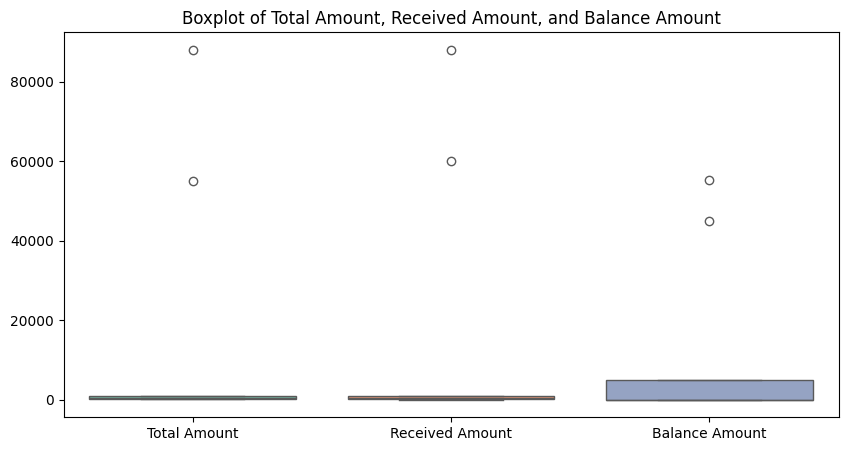

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(10,5))
sns.boxplot(data=df, palette="Set2")
plt.title("Boxplot of Total Amount, Received Amount, and Balance Amount")
plt.show()


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Total Amount     9 non-null      float64
 1   Received Amount  9 non-null      float64
 2   Balance Amount   9 non-null      float64
dtypes: float64(3)
memory usage: 348.0 bytes
None


In [ ]:
import pandas as pd
import warnings

# Sample Data (Replace with your actual DataFrame)
data = {
    "Total Amount": [536.74, 88000, 216, 484, 89, 1000, 55000, 700, 150],  # Example values
    "Received Amount": [499.96, 88000, 198, 462, 65, 900, 60000, 650, 120],
    "Balance Amount": [36.77, 55140, 0, 0, 0, 5000, 45000, 0, 10]
}

df = pd.DataFrame(data)

# 1. Fill missing values in existing numerical columns with 0
for column in ["Total Amount", "Received Amount", "Balance Amount"]:
    df[column].fillna(0, inplace=True)

# 2. Add new columns with default values if they are missing
if "Date of Sale" not in df.columns:
    df["Date of Sale"] = pd.to_datetime("today") # Set to today's date or any other appropriate default
if "Products Sold" not in df.columns:
    df["Products Sold"] = "Unknown"  # Or any other appropriate default value

# 3. (Optional) If other columns need filling, specify them here
# df.fillna({"Customer ID": "Unknown", "Payment Method": "Not Specified"}, inplace=True)

# Display the updated DataFrame
print(df)

   Total Amount  Received Amount  Balance Amount               Date of Sale  \
0        536.74           499.96           36.77 2025-03-26 06:48:11.590394   
1      88000.00         88000.00        55140.00 2025-03-26 06:48:11.590394   
2        216.00           198.00            0.00 2025-03-26 06:48:11.590394   
3        484.00           462.00            0.00 2025-03-26 06:48:11.590394   
4         89.00            65.00            0.00 2025-03-26 06:48:11.590394   
5       1000.00           900.00         5000.00 2025-03-26 06:48:11.590394   
6      55000.00         60000.00        45000.00 2025-03-26 06:48:11.590394   
7        700.00           650.00            0.00 2025-03-26 06:48:11.590394   
8        150.00           120.00           10.00 2025-03-26 06:48:11.590394   

  Products Sold  
0       Unknown  
1       Unknown  
2       Unknown  
3       Unknown  
4       Unknown  
5       Unknown  
6       Unknown  
7       Unknown  
8       Unknown  


<ipython-input-28-301da857e962>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(0, inplace=True)


In [ ]:
import pandas as pd

# Load your dataset
file_path = "Sales.csv"
df = pd.read_csv(file_path)

# Ensure column names are properly formatted
df.columns = df.columns.str.strip().str.lower()

# Select only numeric columns for outlier removal
num_cols = df.select_dtypes(include=['number']).columns

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers
df_cleaned = df[~((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)]

# Print results
print(f"Original dataset size: {df.shape[0]} rows")
print(f"Cleaned dataset size: {df_cleaned.shape[0]} rows")
print(f"Total outliers removed: {df.shape[0] - df_cleaned.shape[0]} rows")


Original dataset size: 6100 rows
Cleaned dataset size: 5249 rows
Total outliers removed: 851 rows


In [ ]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = "Sales.csv"
df.to_csv(cleaned_file_path, index=False)

# Print confirmation
print(f"✅ Cleaned data saved successfully as: {cleaned_file_path}")


✅ Cleaned data saved successfully as: Sales.csv


In [ ]:
#DATA VISUALIZATION
#1️⃣ Boxplot Showing the Distribution of Total Amount (To Check for Outliers)

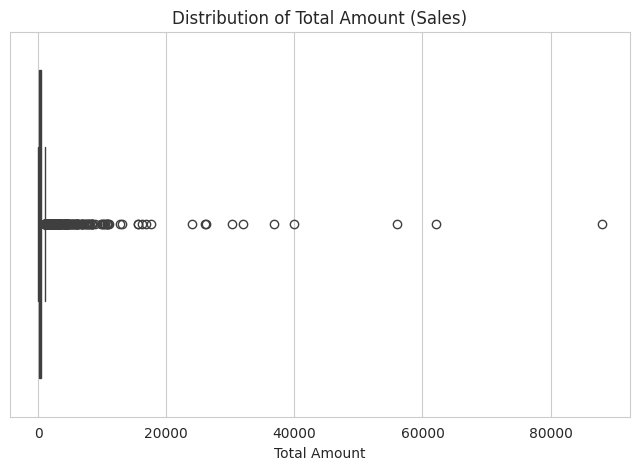

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = "Sales - Sheet1.csv"  # Update this if needed
df = pd.read_csv(file_path)

# Set the style for plots
sns.set_style("whitegrid")

# Convert column names to lowercase to ensure consistency
df.columns = df.columns.str.strip().str.lower()

# Create a Boxplot, using the lowercase column name if necessary
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["total amount"])  # Access using lowercase column name
plt.title("Distribution of Total Amount (Sales)")
plt.xlabel("Total Amount")
plt.show()

In [ ]:
#2️⃣ Line Chart Showing Monthly Revenue Trend Over Time

In [ ]:
# Convert 'Date' column to datetime format
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])
    df["Month"] = df["Date"].dt.to_period("M").astype(str)  # Extract Month-Year

# Group by Month to calculate total revenue
if "Month" in df.columns:
    monthly_sales = df.groupby("Month")["Total Amount"].sum().reset_index()

    # Plot the line chart
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="Month", y="Total Amount", data=monthly_sales, marker="o", color="b")
    plt.xticks(rotation=45)
    plt.title("Monthly Revenue Trend")
    plt.xlabel("Month")
    plt.ylabel("Total Revenue")
    plt.show()


In [ ]:
#3️⃣ Bar Chart Showing the Top 10 Stores by Total Sales

<ipython-input-9-8ba5ba24e335>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total Amount", y="Party Name", data=store_sales, palette="viridis")


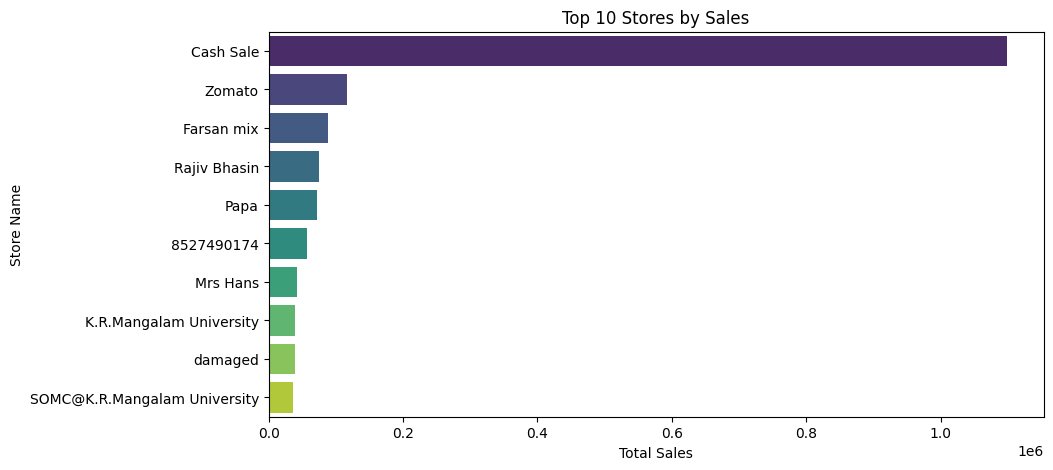

In [ ]:
# Group by 'Party Name' to get total sales per store
if "Party Name" in df.columns:
    store_sales = df.groupby("Party Name")["Total Amount"].sum().reset_index()
    store_sales = store_sales.sort_values(by="Total Amount", ascending=False).head(10)  # Top 10 stores

    # Plot the bar chart
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Total Amount", y="Party Name", data=store_sales, palette="viridis")
    plt.title("Top 10 Stores by Sales")
    plt.xlabel("Total Sales")
    plt.ylabel("Store Name")
    plt.show()


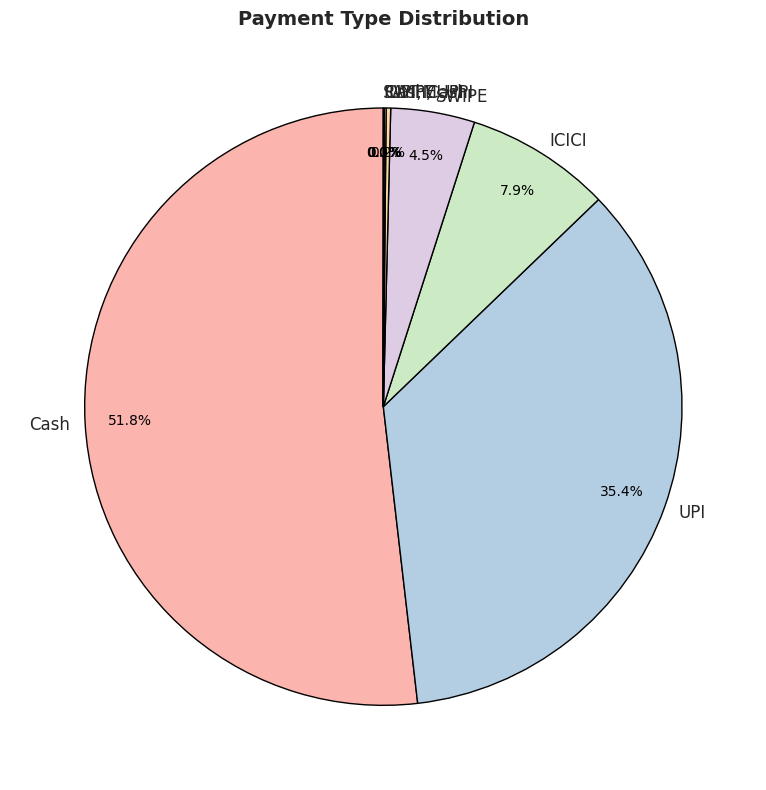

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure inline display in Google Colab
%matplotlib inline

# Load the dataset
file_path = "Sales - Sheet1.csv"  # Use correct file path
df = pd.read_csv(file_path)

# 🔹 Standardize column names (convert to lowercase, remove spaces)
df.columns = df.columns.str.strip().str.lower()

# 🔹 Check if 'payment type' column exists
if "payment type" in df.columns:
    # Count occurrences of each payment type
    payment_counts = df["payment type"].value_counts()

    # Create a figure with an increased size
    plt.figure(figsize=(8, 8))

    # Plot the pie chart with better label formatting
    wedges, texts, autotexts = plt.pie(
        payment_counts,
        labels=payment_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=plt.cm.Pastel1.colors,
        wedgeprops={"edgecolor": "black", "linewidth": 1},  # Add border
        pctdistance=0.85,  # Move percentage labels inside
        labeldistance=1.05  # Move labels outward to avoid overlap
    )

    # Adjust font size for better readability
    for text in texts:
        text.set_fontsize(12)  # Adjust label size
    for autotext in autotexts:
        autotext.set_fontsize(10)  # Adjust percentage size
        autotext.set_color("black")  # Make percentage labels visible

    # Set title
    plt.title("Payment Type Distribution", fontsize=14, fontweight="bold")

    # Make layout tight to prevent overlap
    plt.tight_layout()

    # Show the pie chart
    plt.show()


In [ ]:
print("Column names:", df.columns)

Column names: Index(['date', 'party name', 'transaction type', 'total amount',
       'payment type', 'received amount', 'balance amount'],
      dtype='object')


In [ ]:


df.rename(columns={'YourDateColumnName': 'Date'}, inplace=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure inline display in Google Colab
%matplotlib inline

# Load the dataset
file_path = "Sales.csv"  # Use the correct path
df = pd.read_csv(file_path)

# 🔹 Convert 'Date' column to datetime format if it exists
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# 🔹 Standardize column names (convert to lowercase, remove spaces)
df.columns = df.columns.str.strip().str.lower()

# 🔹 Check if 'total amount' exists in the dataset
if "total amount" in df.columns and "date" in df.columns:
    # Group by 'Date' and sum total sales
    daily_sales = df.groupby("date")["total amount"].sum().reset_index()

    # Create figure and plot sales over time
    plt.figure(figsize=(20, 10))
    sns.lineplot(x="date", y="total amount", data=daily_sales, marker="o", color="b")

    # Formatting
    plt.title("Sales Over Time", fontsize=14, fontweight="bold")
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Total Sales", fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.grid(True, linestyle="--", alpha=0.5)  # Add light grid lines

    # Force display
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Sales.csv'

Top 5 Parties:
 party name
Cash Sale       1098502.39
Zomato           116755.00
Farsan mix        88573.00
Rajiv Bhasin      74840.00
Papa              72211.50
Name: total amount, dtype: float64


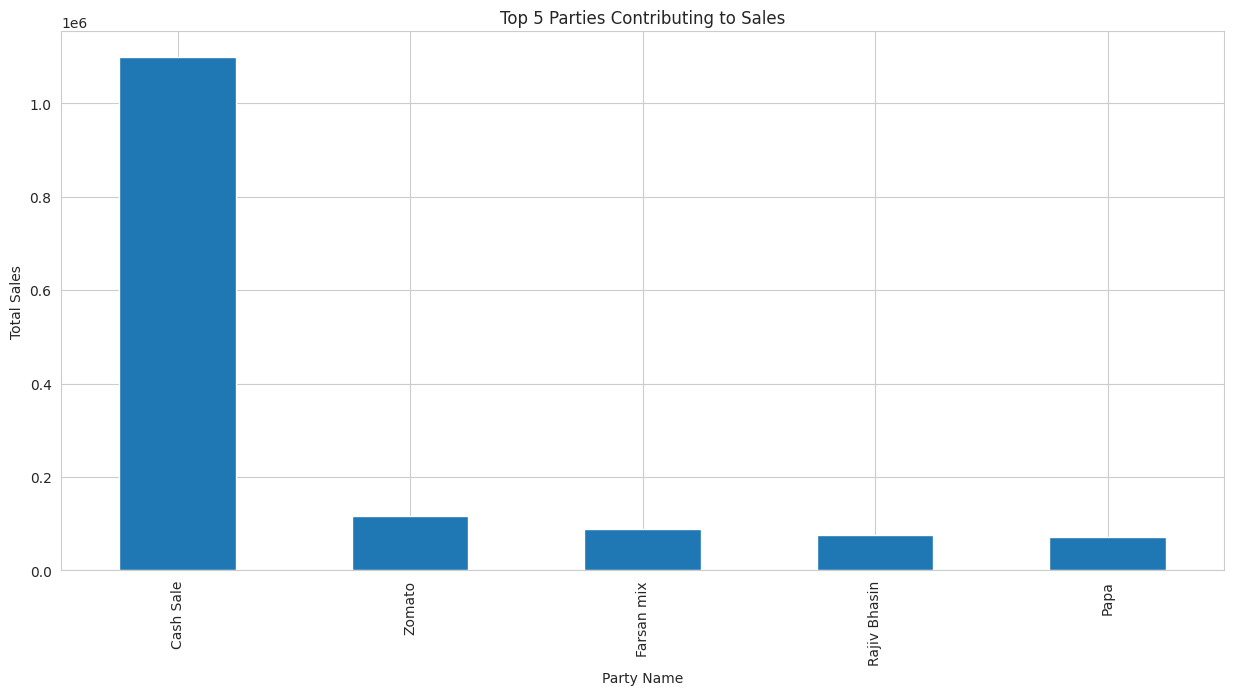

In [ ]:
# Top 5 parties contributing to sales
top_parties = df.groupby('party name')['total amount'].sum().sort_values(ascending=False).head(5)  # Changed column names to lowercase
print("Top 5 Parties:\n", top_parties)

# Plot the top 5 parties
plt.figure(figsize=(15, 7))
top_parties.plot(kind='bar', title='Top 5 Parties Contributing to Sales')
plt.xlabel('Party Name')
plt.ylabel('Total Sales')
plt.show()

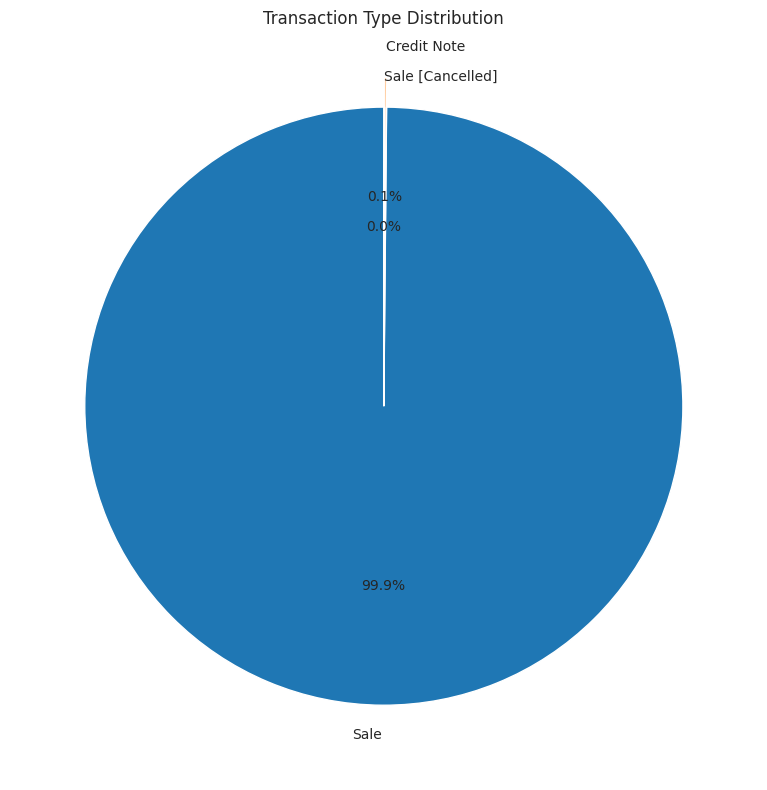

In [ ]:
# Aggregate small categories and explode specific slices
transaction_counts = df['transaction type'].value_counts()

# Explode the overlapping slices (e.g., 'Credit Note' and 'Sales Canceled')
explode = [0.1 if label in ['Credit Note', 'Sales Canceled'] else 0 for label in transaction_counts.index]

# Create a pie chart with better readability
plt.figure(figsize=(15, 8))
transaction_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=explode,  # Separate specific slices
    startangle=90,    # Rotate for better alignment
    title='Transaction Type Distribution'
)
plt.ylabel('')  # Remove y-axis label
plt.tight_layout()
plt.show()
